# Task 2 Problem 3 :

   # Your task is to help John from STA IT                     services to create a linear regression model         in Python or R to predict the CTC/Salary of           new hires from the data provided. 
   
   # Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

# Loading Datasets 

In [3]:
train_data = pd.read_excel('Data_file.xlsx' , header = 2)
test_data = pd.read_excel('Test_data_file.xlsx')

# Processing Datasets

In [4]:
train_data.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [5]:
#Displaying the summary of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
S.No.                   1338 non-null int64
College                 1338 non-null object
Role                    1338 non-null object
City type               1338 non-null object
Previous CTC            1338 non-null int64
Previous job changes    1338 non-null int64
Graduation marks        1338 non-null int64
Exp (Months)            1338 non-null int64
CTC                     1338 non-null float64
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [6]:
#Describtion of the dataset
train_data.describe()

,S.No.,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,386.391641,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,335.250000,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,669.500000,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,1003.750000,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,1338.000000,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [7]:
test_data.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


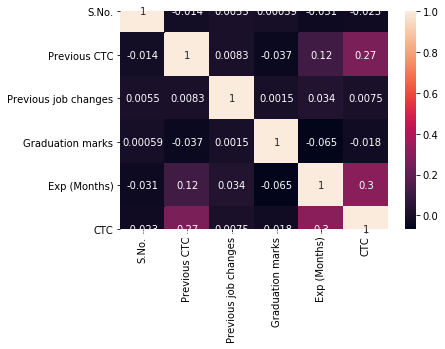

In [9]:
sea.heatmap(train_data.corr() , annot = True)

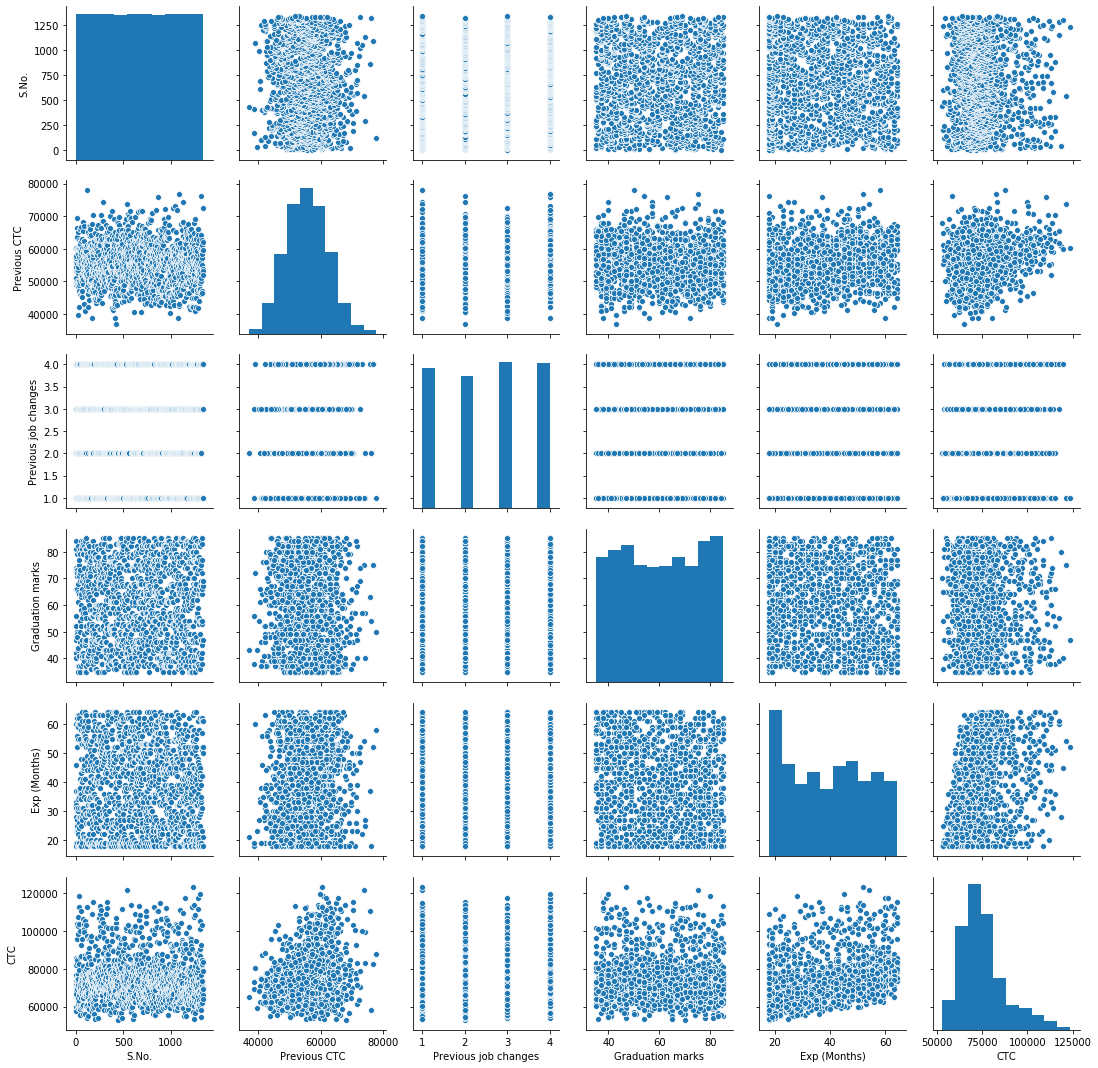

In [10]:
sea.pairplot(train_data)

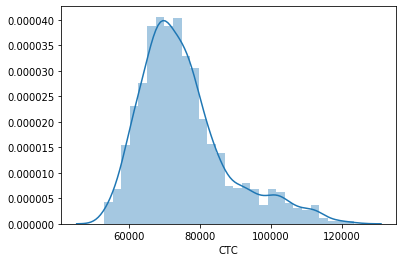

In [11]:
sea.distplot(train_data["CTC"])

In [14]:
n = 5
train_data['Exp (Months)'].value_counts()[:n].index.tolist()

[18, 19, 51, 45, 46]

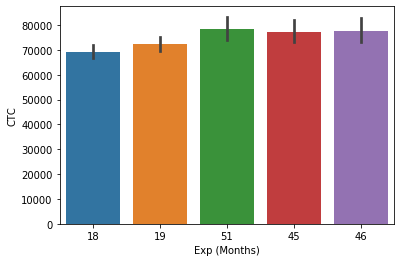

In [15]:
sea.barplot(x = 'Exp (Months)' , y = 'CTC' , order = [18, 19, 51, 45, 46] , data = train_data)

In [16]:
n = 5
train_data['Graduation marks'].value_counts()[:n].index.tolist()

[37, 46, 82, 75, 42]

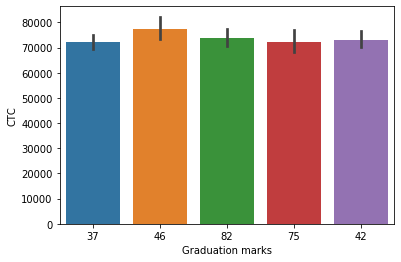

In [17]:
sea.barplot(x = 'Graduation marks' , y = 'CTC' , order = [37, 46, 82, 75, 42] , data = train_data)

In [18]:
test_data.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
test_data.columns

Index(['College', 'Role', 'City type', 'College_T1', 'College_T2',
       'Role_Manager', 'City_Metro', 'previous CTC', 'previous job changes',
       'Graduation marks', 'Exp', 'Actual CTC', 'Predicted CTC', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [20]:
#Dropping unwanted columns
test_data.drop(test_data.columns[14:23] , axis = 1 , inplace = True)
test_data.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,Unnamed: 13,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN,NaN,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN,NaN,NaN


In [21]:
del test_data['Unnamed: 13']
del test_data['Unnamed: 23']

In [22]:
test_data.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN


In [23]:
del test_data['Role']
del test_data['College']
del test_data['City type']

In [24]:
test_data.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,0,0,0,1,57879,4,74,32,73878.097729,NaN


In [25]:
x = test_data[['previous CTC','previous job changes','Graduation marks','Exp','College_T1','College_T2','Role_Manager','City_Metro']]
y = test_data[['Actual CTC']]

In [26]:
x

,previous CTC,previous job changes,Graduation marks,Exp,College_T1,College_T2,Role_Manager,City_Metro
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1
3,49010,2,81,33,0,0,0,1
4,57879,4,74,32,0,0,0,1
...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,0,0,0,1
1334,53714,1,67,18,1,0,0,0
1335,61957,1,47,18,0,1,0,0
1336,53203,3,69,21,1,0,0,0


In [27]:
y

,Actual CTC
0,71406.576531
1,68005.870631
2,76764.020277
3,82092.386880
4,73878.097729
...,...
1333,69712.403655
1334,69298.750099
1335,66397.770686
1336,64044.382949


In [29]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 101)

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
prediction = lm.predict(x)
test_data['Predicted CTC'] = prediction
test_data.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.576531,85479.353477
1,0,1,0,1,57081,1,84,18,68005.870631,66555.819929
2,0,1,0,1,60347,2,52,28,76764.020277,70643.819779
3,0,0,0,1,49010,2,81,33,82092.386880,67203.839421
4,0,0,0,1,57879,4,74,32,73878.097729,70681.598118


In [32]:
#predicted CTC
prediction

array([[85479.35347671],
       [66555.81992913],
       [70643.81977927],
       ...,
       [65110.95620789],
       [65772.64048578],
       [91010.38463203]])

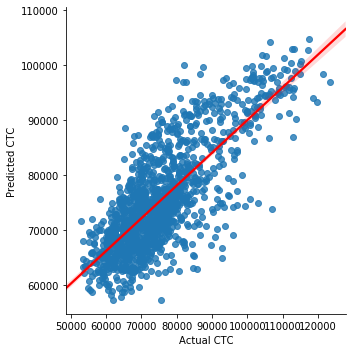

In [33]:
#Plotting the predicted CTC with Actual CTC
sea.lmplot(x = 'Actual CTC' , y = 'Predicted CTC' , data = test_data , line_kws = {'color': 'red'})

# Calculation of Mean Squared Error

In [35]:
from sklearn import metrics

print("Mean Squared Error: " , metrics.mean_squared_error(y , prediction))
print("Root Mean Squared Error: " , np.sqrt(metrics.mean_squared_error(y , prediction)))

Mean Squared Error:  61978530.92696363
Root Mean Squared Error:  7872.644468472054
